# Problem Definition
# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [102]:
import pandas as pd
import numpy as np

In [103]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [104]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [106]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [174]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value in the data base.

But it has lot of object values, need to be change to float.

In [175]:
df[ 'gender'].unique()

array([0, 1])

In [176]:
df[ 'SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [177]:
df[ 'Partner'].unique()

array([1, 0])

In [178]:
df[ 'Dependents'].unique()

array([0, 1])

In [179]:
df[ 'PhoneService'].unique()

array([0, 1])

In [180]:
df[ 'MultipleLines'].unique()

array([1, 0, 2])

In [181]:
df[ 'InternetService'].unique()

array([0, 1, 2])

In [182]:
df[ 'PhoneService'].unique()

array([0, 1])

In [183]:
df[ 'MultipleLines'].unique()

array([1, 0, 2])

In [184]:
df['InternetService'].unique()

array([0, 1, 2])

In [185]:
df[ 'OnlineSecurity'].unique()

array([0, 2, 1])

In [186]:
df[ 'OnlineBackup'].unique()

array([2, 0, 1])

In [187]:
df[ 'DeviceProtection'].unique()

array([0, 2, 1])

In [188]:
df[ 'TechSupport'].unique()

array([0, 2, 1])

In [189]:
df[ 'StreamingTV'].unique()

array([0, 2, 1])

In [190]:
df[ 'StreamingMovies'].unique()

array([0, 2, 1])

In [191]:
df[ 'Contract'].unique()

array([0, 1, 2])

In [192]:
df[ 'PaperlessBilling'].unique()

array([1, 0])

In [193]:
df[ 'PaymentMethod'].unique()

array([2, 3, 0, 1])

In [194]:
df[ 'Churn'].unique()

array([0, 1])

In [195]:
df[ 'TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
le=LabelEncoder()

In [198]:
d1=le.fit_transform(df['gender'])
d2=le.fit_transform(df['SeniorCitizen'])
d3=le.fit_transform(df['Partner'])
d4=le.fit_transform(df['Dependents'])
d5=le.fit_transform(df['PhoneService'])
d6=le.fit_transform(df['InternetService'])
d7=le.fit_transform(df['OnlineSecurity'])
d8=le.fit_transform(df['OnlineBackup'])
d9=le.fit_transform(df['DeviceProtection'])
d10=le.fit_transform(df['TechSupport'])
d11=le.fit_transform(df['StreamingTV'])
d12=le.fit_transform(df['StreamingMovies'])
d13=le.fit_transform(df['Contract'])
d14=le.fit_transform(df['PaperlessBilling'])
d15=le.fit_transform(df['PaymentMethod'])
d16=le.fit_transform(df['MultipleLines'])
d17=le.fit_transform(df['Churn'])

In [199]:
df['gender']=d1
df['SeniorCitizen']=d2
df['Partner']=d3
df['Dependents']=d4
df['PhoneService']=d5
df['InternetService']=d6
df['OnlineSecurity']=d7
df['OnlineBackup']=d8
df['DeviceProtection']=d9
df['TechSupport']=d10
df['StreamingTV']=d11
df['StreamingMovies']=d12
df['Contract']=d13
df['PaperlessBilling']=d14
df['PaymentMethod']=d15
df['MultipleLines']=d16
df['Churn']=d17

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [201]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [203]:
df_1.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [204]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [205]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

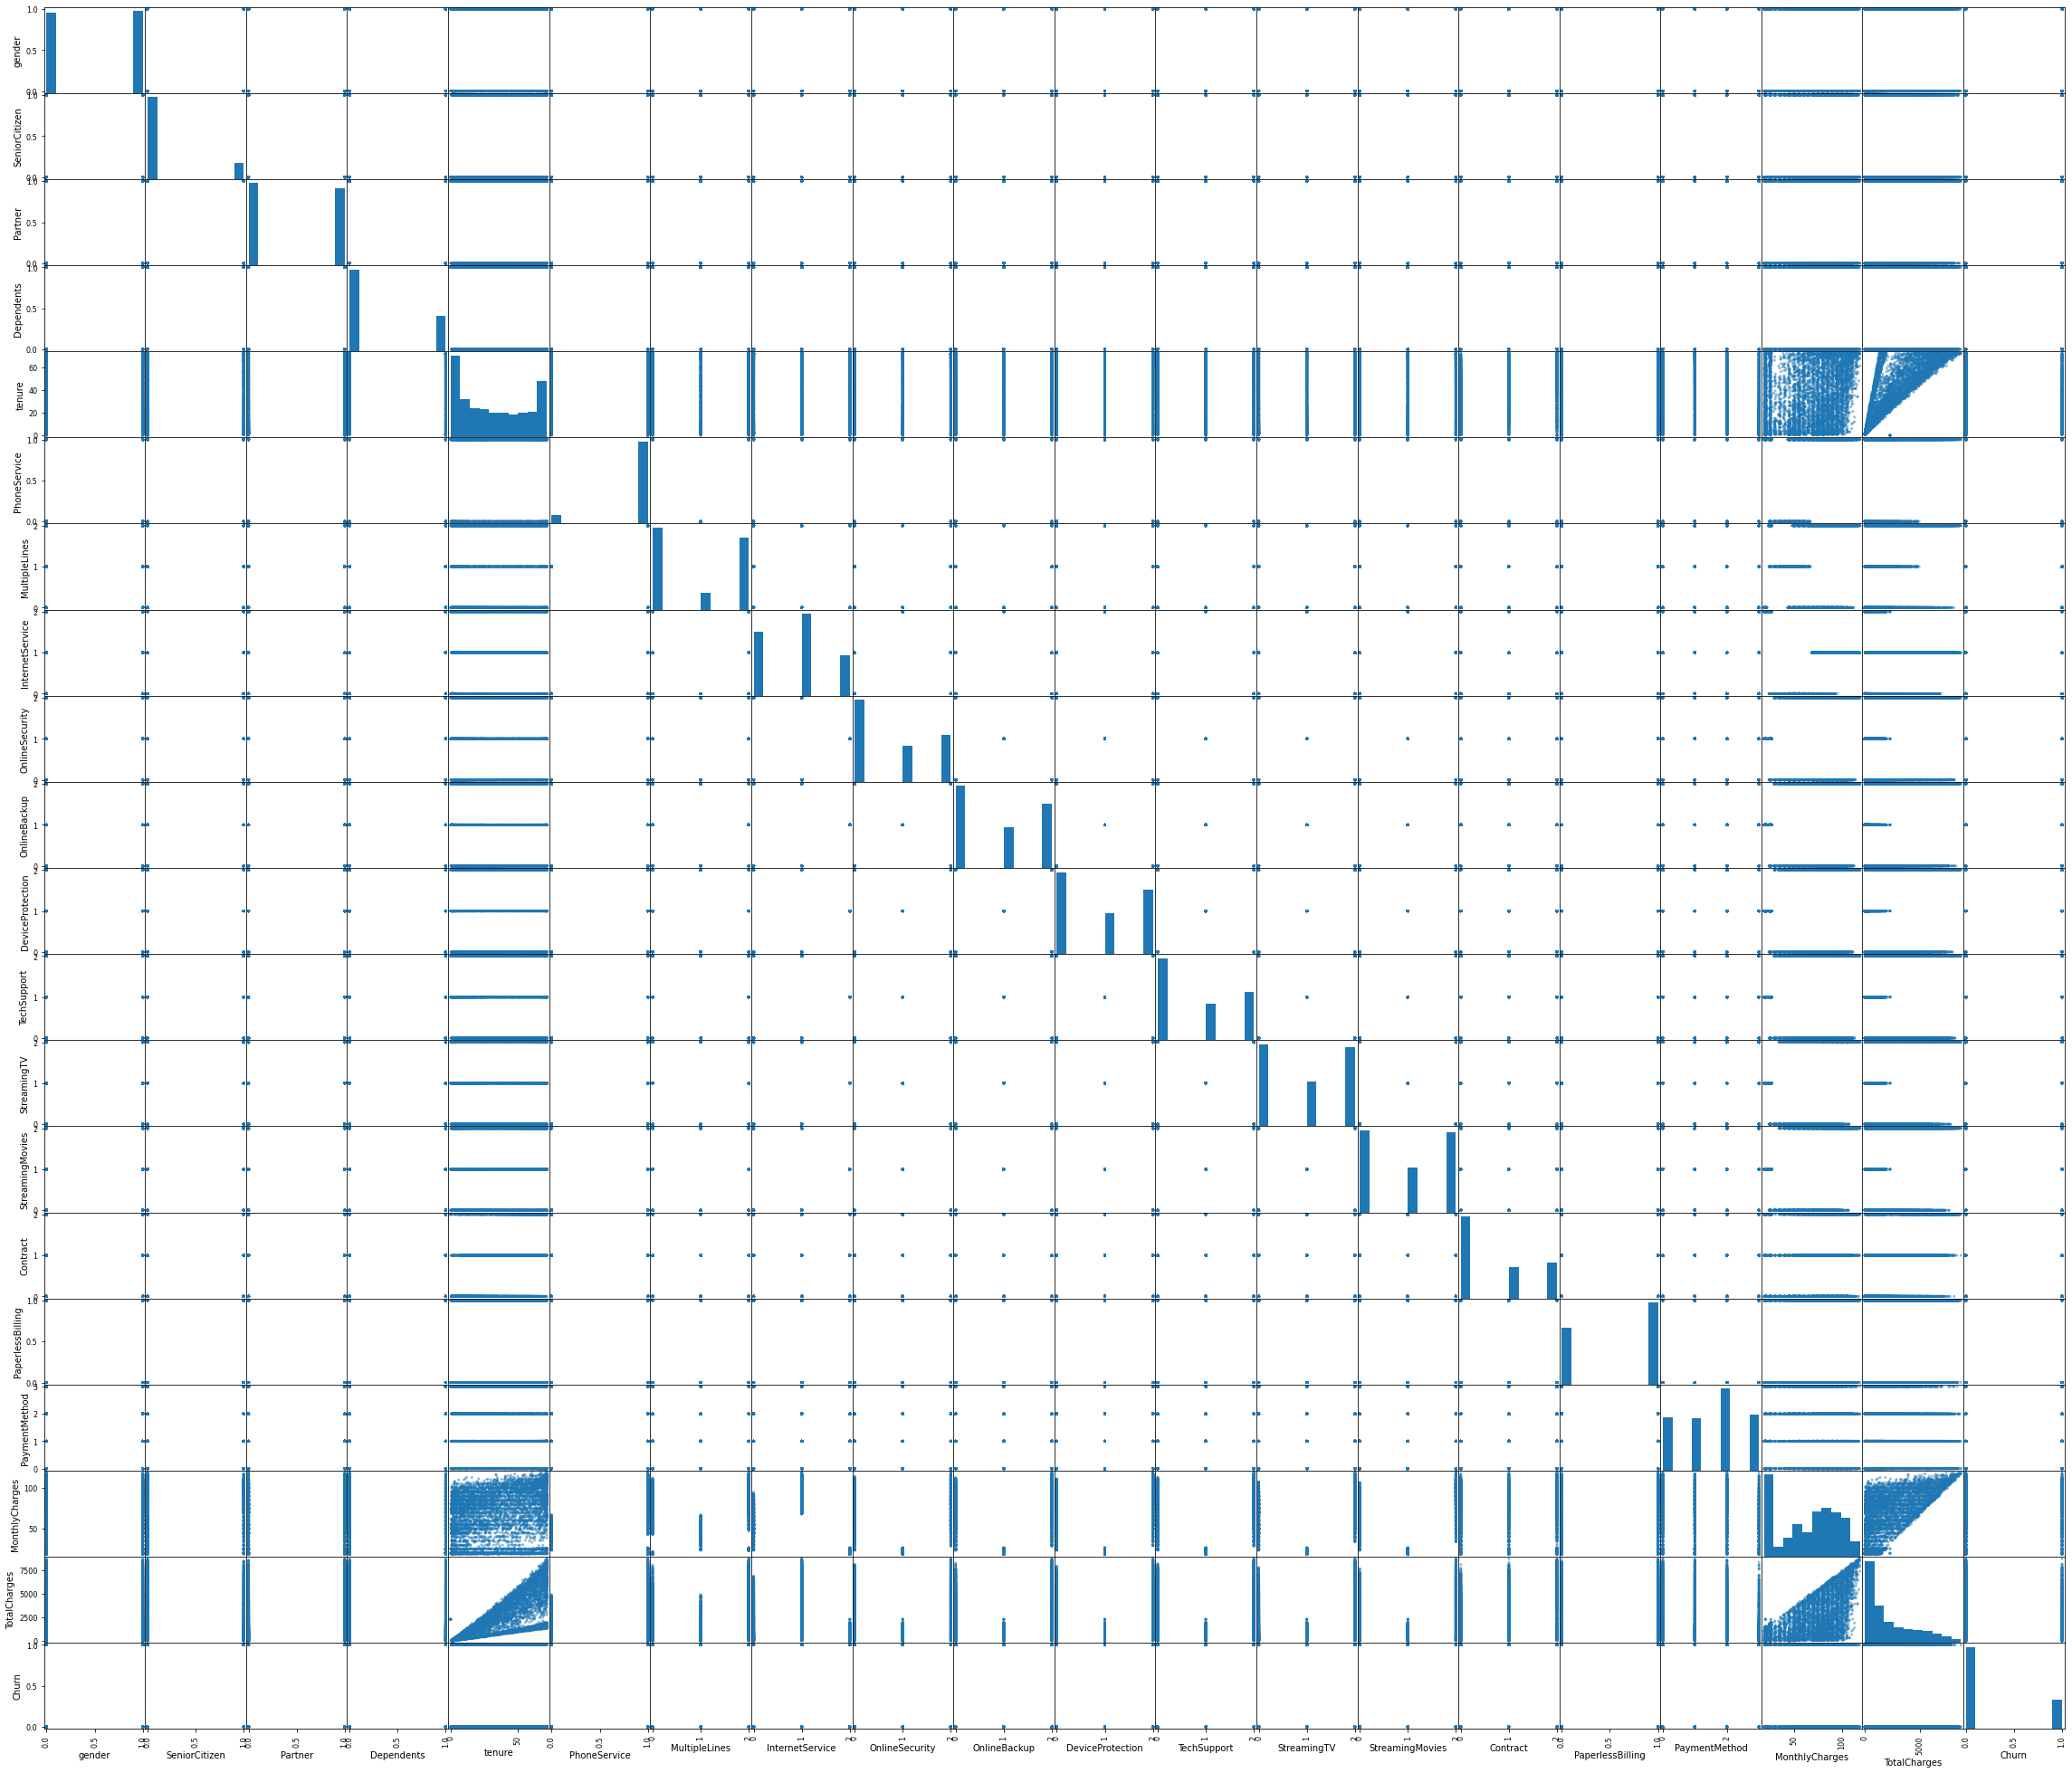

In [206]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
scatter_matrix(df, figsize=(40,35))
plt.show()

In [207]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

<AxesSubplot:xlabel='tenure', ylabel='Density'>

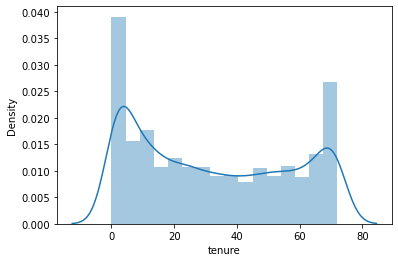

In [208]:
sns.distplot(df["tenure"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

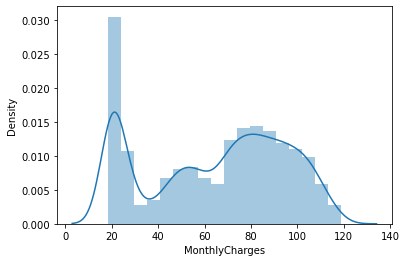

In [209]:
sns.distplot(df["MonthlyCharges"])

In [210]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [211]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [212]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

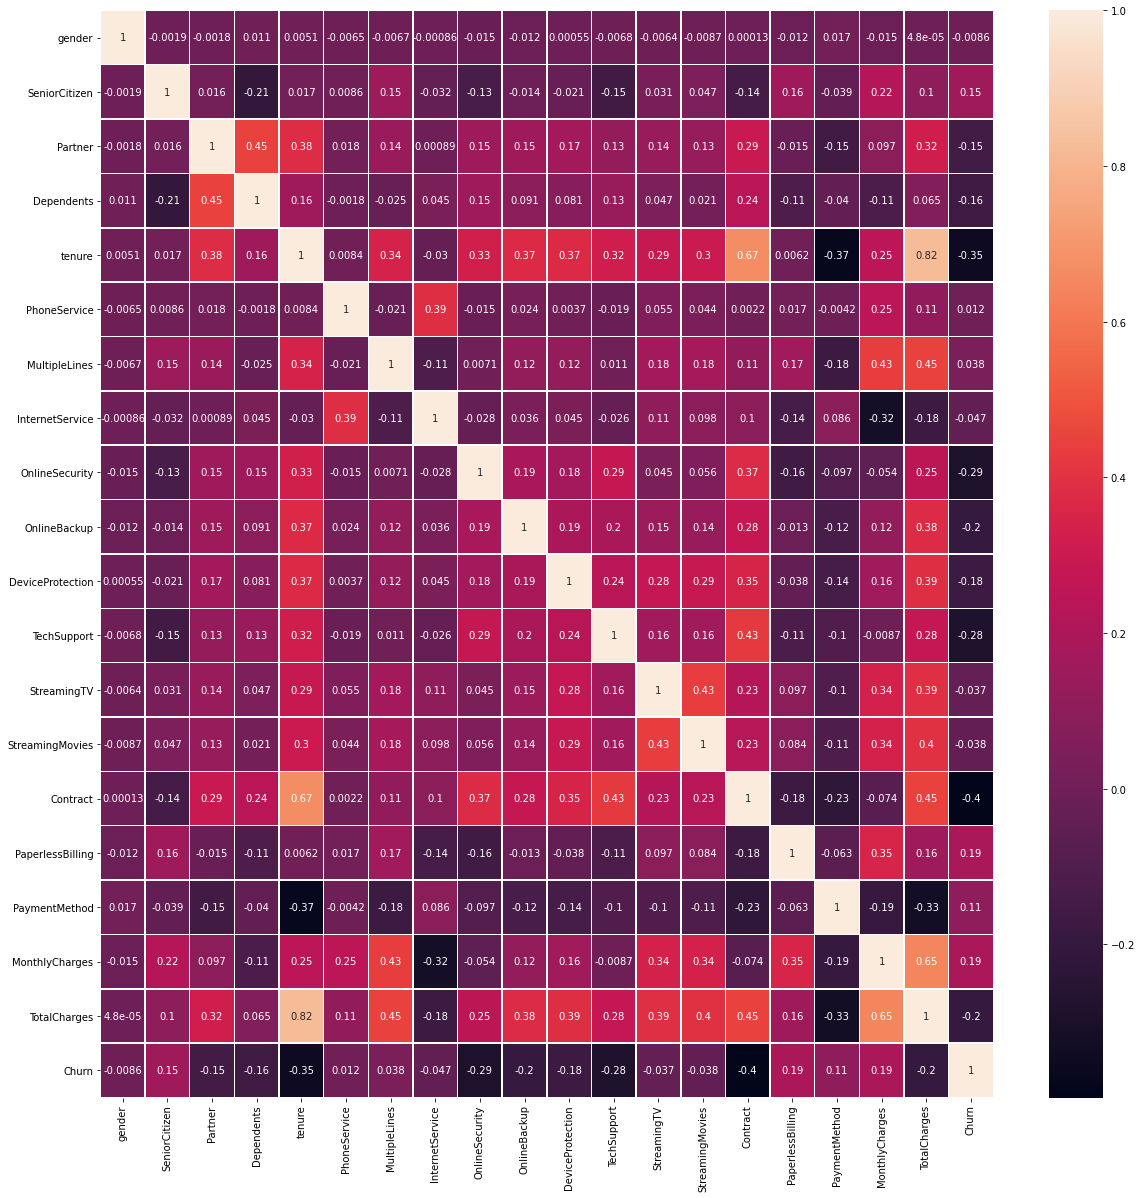

In [213]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True, linewidth=0.5,)

Tenure and TotalCharges are stronly correlated. Only one attribute can be taken in consideration.

Also dropping customerID

In [214]:
df1=df.drop(columns='customerID')

In [215]:
df_1=df1.drop(columns='tenure')

In [216]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

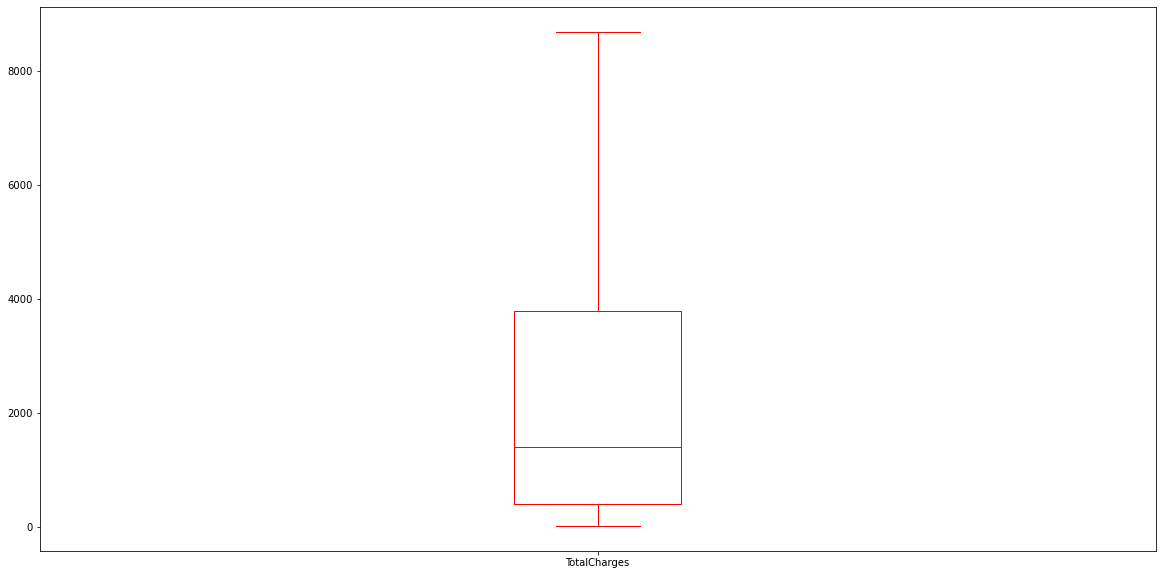

In [217]:
df_1['TotalCharges'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:>

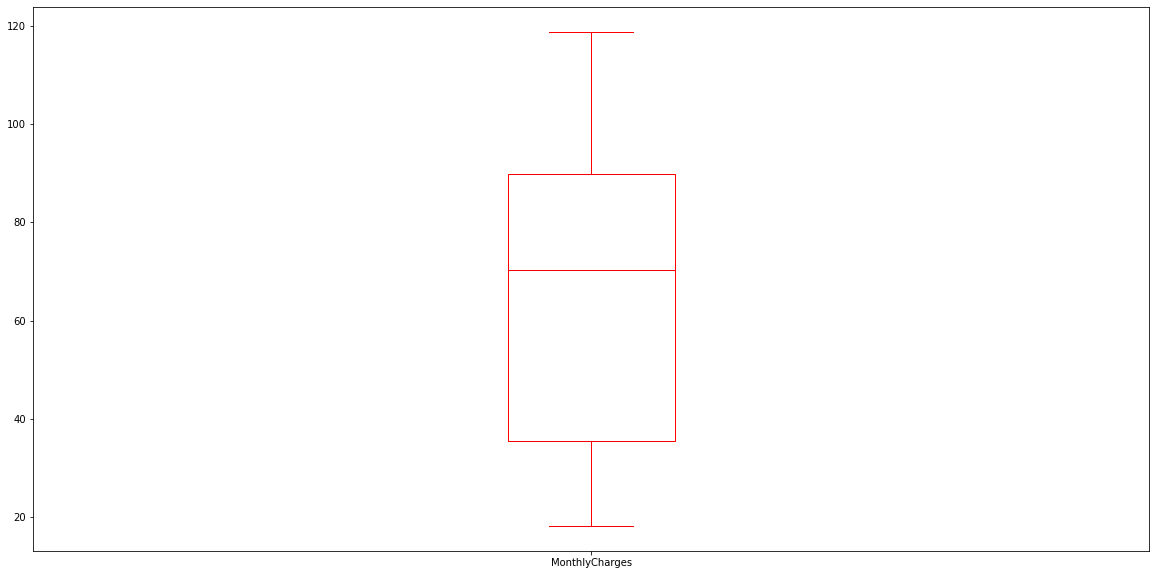

In [218]:
df_1['MonthlyCharges'].plot(kind='box', figsize=(20,10), color='r')

# EDA Concluding Remarks:
1. replaced all object to float/integer.
2. high correlation found between monthly charges and tenure so tenure deleted..
3. majorly categorical data, no outlier found in the continuous data
4. We need to predict the churn rate, so it is a classification problem.

# Pre-processing Pipeline

In [219]:
x=df_1.drop(columns='Churn')
y=df['Churn']

In [220]:
df_1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [221]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99497138],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17387565],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.96039939],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85518222],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87277729],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01391739]])

In [222]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [223]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.001933,gender
1,1.147956,SeniorCitizen
2,1.442544,Partner
3,1.381658,Dependents
4,1.622081,PhoneService
5,1.383347,MultipleLines
6,1.826159,InternetService
7,1.267756,OnlineSecurity
8,1.218530,OnlineBackup
9,1.296507,DeviceProtection


VIF is less than 5 so it's good to go with the given dataset.

## Building Machine Learning Models

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

## Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [226]:
y_predict_test = classifier.predict(x_test)

In [227]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[1143,  136],
       [ 231,  251]], dtype=int64)

In [228]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1279
           1       0.65      0.52      0.58       482

    accuracy                           0.79      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761



In [231]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val=cross_val_score(classifier, x,y,cv=10)
cross_val.mean()

0.794548275306254

In [232]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_search2 = GridSearchCV(classifier, param_grid=param)

In [233]:
grid_result = grid_search2.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 10}


In [235]:
regress=LogisticRegression(C=10)
regress.fit(x_train, y_train)

LogisticRegression(C=10)

In [236]:
y_predict_t = regress.predict(x_test)

In [237]:
accuracy_score(y_test, y_predict_t)

0.7921635434412265

In [238]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1279
           1       0.65      0.52      0.58       482

    accuracy                           0.79      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761



logistic Regression:85%

# Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [244]:
y_pr=clf.predict(x_test)

In [245]:
accuracy_score(y_test, y_pr)

0.7876206700738216

In [246]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1279
           1       0.66      0.47      0.55       482

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.77      0.79      0.78      1761



In [247]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[1161,  118],
       [ 256,  226]], dtype=int64)

In [248]:
cross_val=cross_val_score(clf, x,y,cv=7)
cross_val.mean()

0.7865949430386048

In [249]:
param_grid_1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_1 = GridSearchCV(estimator = clf, param_grid = param_grid_1)

In [250]:
grid_result_1 = grid_search_1.fit(x_train, y_train)
print('Best Params: ', grid_result_1.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3}


In [251]:
print('Best Score: ', grid_result_1.best_score_)

Best Score:  0.79912774863106


In [252]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 90, max_features= 2, min_samples_leaf= 3)

In [253]:
rf.fit(x_train, y_train)
y_pr1=rf.predict(x_test)

In [254]:
accuracy_score(y_test, y_pr1)

0.7995457126632595

Random forest=79%

## KNN algorithm

In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
knn=KNeighborsClassifier()

In [257]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [258]:
y_predict=knn.predict(x_test)

In [259]:
accuracy_score(y_test, y_predict)

0.7512776831345827

In [260]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1094,  185],
       [ 253,  229]], dtype=int64)

In [261]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1279
           1       0.55      0.48      0.51       482

    accuracy                           0.75      1761
   macro avg       0.68      0.67      0.67      1761
weighted avg       0.74      0.75      0.75      1761



In [262]:
cross_val=cross_val_score(knn,x,y,cv=7)
cross_val.mean()

0.7596207405869789

In [263]:
param_grid ={'algorithm':['kd_tree','brute'] , 'leaf_size':[10,11,14,18,20,25,30]}

In [264]:
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 18, 20, 25, 30]})

In [265]:
grid_result = grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'algorithm': 'kd_tree', 'leaf_size': 10}


In [266]:
kn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=10)

In [267]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10)

In [268]:
y_predict1=kn.predict(x_test)

In [269]:
accuracy_score(y_test, y_predict1)

0.750709823963657

In [270]:
cfm=confusion_matrix(y_test,y_predict1)
cfm

array([[1094,  185],
       [ 254,  228]], dtype=int64)

In [271]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1279
           1       0.55      0.47      0.51       482

    accuracy                           0.75      1761
   macro avg       0.68      0.66      0.67      1761
weighted avg       0.74      0.75      0.74      1761



In [272]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.7445991370660245


knn best score=74%

In [273]:
a=np.array(y_test)
lr=np.array(classifier.predict(x_test))
rf=np.array(clf.predict(x_test))
k=np.array(kn.predict(x_test))
df_loan=pd.DataFrame({'original':a,'Predicted_lr':lr,'pred_rf':rf,'pred_knn':k})
df_loan.head(10)

,original,Predicted_lr,pred_rf,pred_knn
0,1,1,1,1
1,0,1,1,1
2,0,0,0,1
3,1,1,0,0
4,1,1,1,1
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,1,0,0,1


<AxesSubplot:>

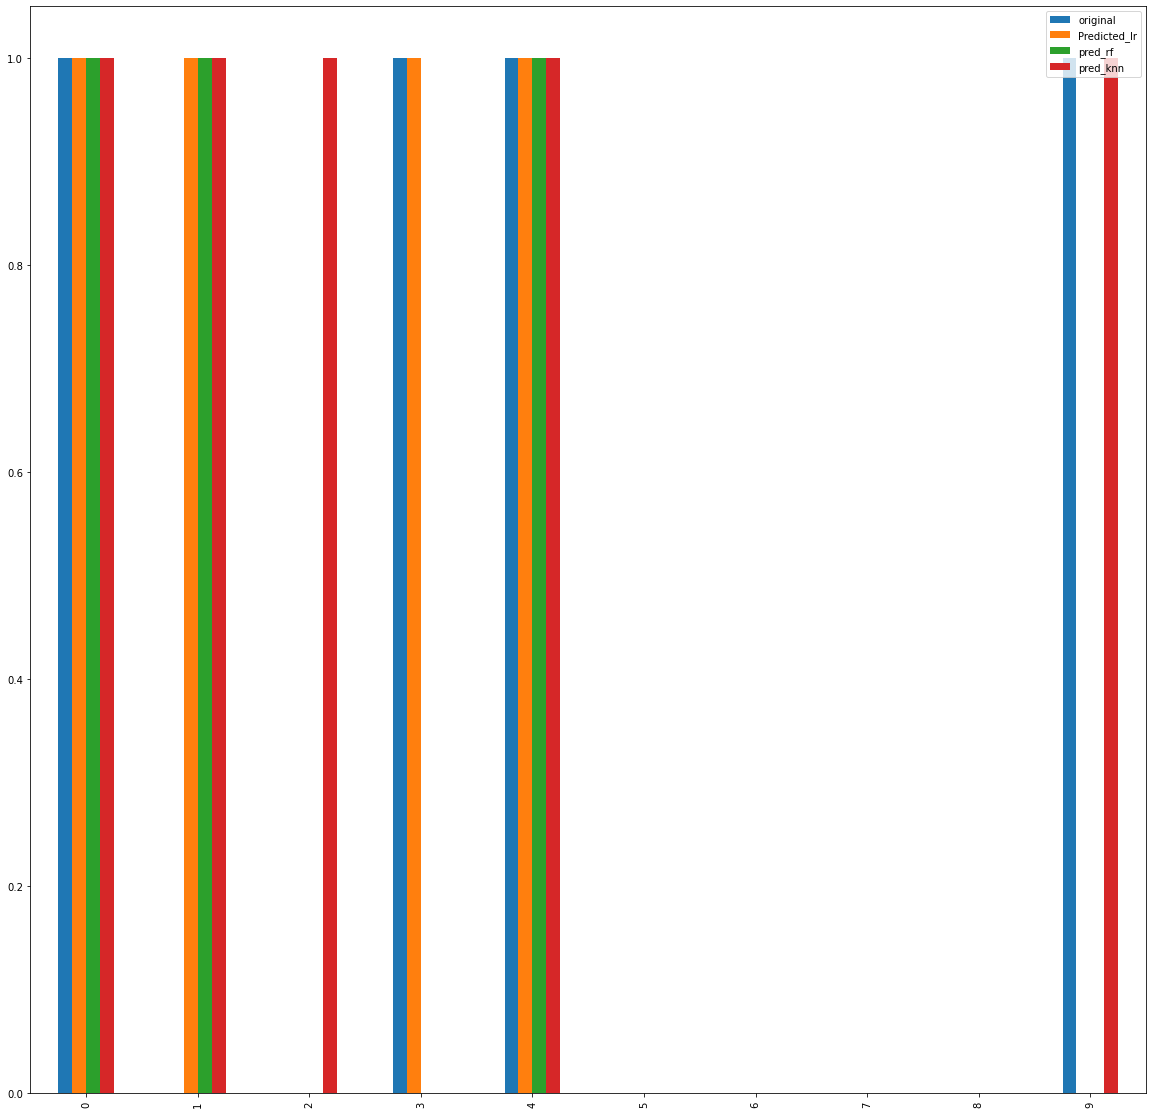

In [274]:
df_loan.head(10).plot.bar(figsize=(20,20))

## Concluding Remark
Taking Logistic Regression is the best model as it has highest accuracy.

In [275]:
import pickle
filename='Customer Churn Analysis.pickle'
pickle.dump(regress,open(filename,'wb'))